In [107]:
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

'0.22.1'

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,9054


In [4]:
train.describe()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.876406,12.931100,6.564300,65.145324,0.381495,79.969331,3.814900,32001.803282,2.01220,0.255635,6266.554200
std,16.138072,3.539803,6.971982,11.882934,0.121301,2.759739,1.902577,9431.995196,1.03998,0.381128,3610.170288
min,0.000000,1.000000,0.000000,0.000000,0.134000,74.740000,1.000000,831.695553,0.00000,0.000316,2.000000
25%,30.593607,11.000000,2.000000,56.927985,0.293665,77.960000,2.000000,25757.636908,1.00000,0.012063,3139.750000
50%,41.278539,13.000000,4.000000,65.587967,0.365879,79.540000,4.000000,32060.336419,2.00000,0.074467,6280.500000
75%,52.511416,15.000000,9.000000,73.336372,0.451346,81.560000,5.000000,38380.641513,3.00000,0.354059,9391.500000
max,100.000000,23.000000,54.000000,100.000000,0.882648,97.510000,7.000000,64297.651218,5.00000,2.365378,12500.000000


# Applying Transformations and Visualization

In [10]:
from scipy.stats import boxcox

<b>Safety Score

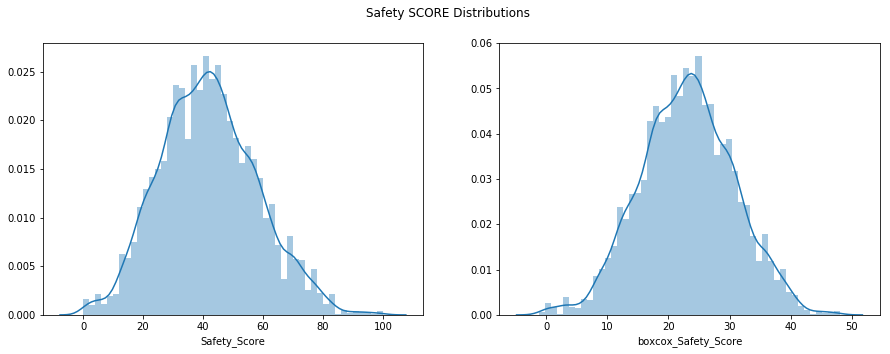

In [28]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot((train['Safety_Score']), ax=axes[0])
sns.distplot(boxcox(train['Safety_Score']+0.01)[0], axlabel='boxcox_Safety_Score', ax=axes[1])
plt.suptitle('Safety SCORE Distributions')
plt.show()

In [31]:
train['box_safety'] = boxcox(train['Safety_Score']+0.01)[0]

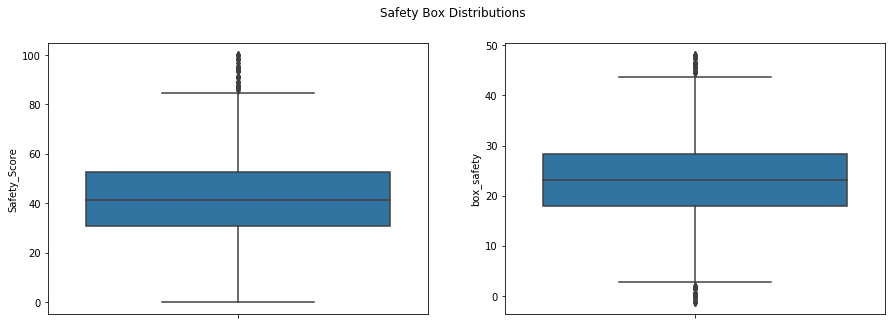

In [36]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Safety_Score', data=train, ax=axes[0], orient='v')
sns.boxplot(x='box_safety', data=train, ax=axes[1], orient='v')
plt.suptitle('Safety Box Distributions')
plt.show()

Which one to pick?<br/>
Q1. Should pick boxcox and remove upper and lower outliers or vice versa?<br/>
A1. Clip the outliers at the bounds

<b>Inception Days

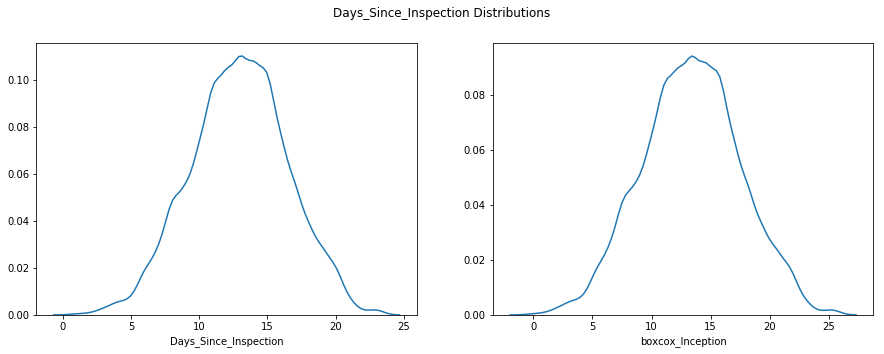

In [39]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.distplot((train['Days_Since_Inspection']), ax=axes[0], hist=False)
sns.distplot(boxcox(train['Days_Since_Inspection']+0.01)[0], axlabel='boxcox_Inception', ax=axes[1], hist=False)
plt.suptitle('Days_Since_Inspection Distributions')
plt.show()

In [40]:
train['boxcox_Inception'] = boxcox(train['Days_Since_Inspection']+0.01)[0]

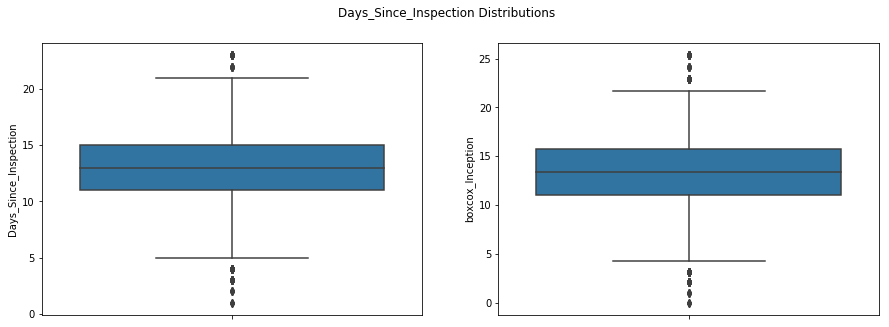

In [41]:
f, axes = plt.subplots(1, 2, figsize=(15,5))
sns.boxplot(x='Days_Since_Inspection', data=train, ax=axes[0], orient='v')
sns.boxplot(x='boxcox_Inception', data=train, ax=axes[1], orient='v')
plt.suptitle('Days_Since_Inspection Distributions')
plt.show()

Distribution in both plots is normal, but boxcox gives a better distribution

<b>Safety Complaints

In [127]:
train['complaint_safe_box'] = boxcox(train['Total_Safety_Complaints']+0.01)[0]
train['complaint_safe_root'] = (np.sqrt(train['Total_Safety_Complaints']))

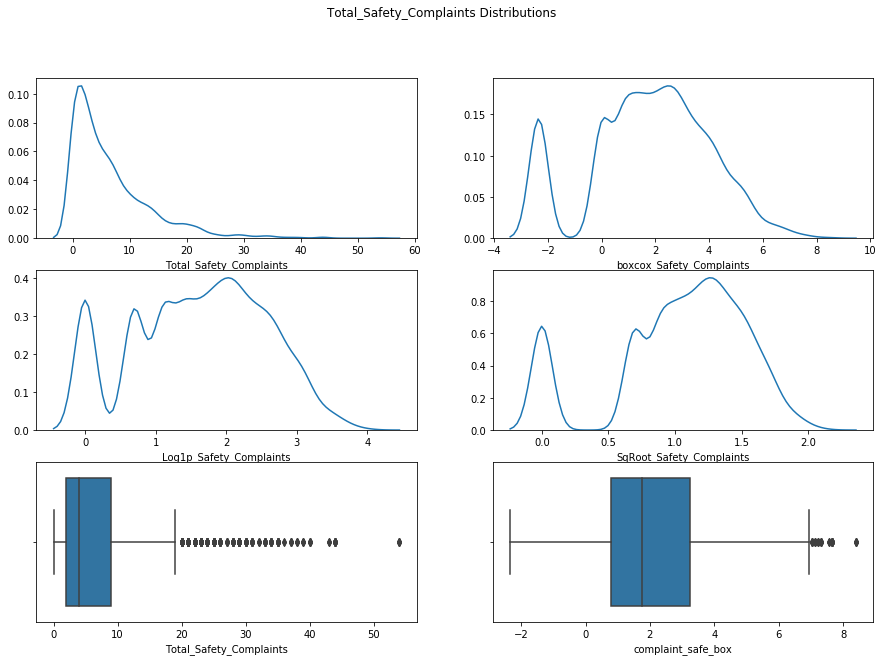

In [128]:
f, axes = plt.subplots(3, 2, figsize=(15,10))
sns.distplot(train['Total_Safety_Complaints'], ax=axes[0,0], hist=False)
sns.distplot(boxcox(train['Total_Safety_Complaints']+0.01)[0], axlabel='boxcox_Safety_Complaints', ax=axes[0,1], hist=False)
sns.distplot(np.log1p(train['Total_Safety_Complaints']), axlabel='Log1p_Safety_Complaints', ax=axes[1,0], hist=False)
sns.distplot(np.log1p(train['complaint_safe_root']), axlabel='SqRoot_Safety_Complaints', ax=axes[1,1], hist=False)
sns.boxplot(x='Total_Safety_Complaints', data=train, ax=axes[2,0])
sns.boxplot(x='complaint_safe_box', data=train, ax=axes[2,1])
plt.suptitle('Total_Safety_Complaints Distributions')
plt.show()

Scaling and Checking if it converts the distribution to Normal

In [117]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [118]:
minmax = MinMaxScaler(feature_range=(0,5))
stsc = StandardScaler()

In [126]:
train['Complaints_STD_MINMAX'] = minmax.fit_transform(stsc.fit_transform(train['Total_Safety_Complaints'].values.reshape(-1,1)))

In [129]:
train['complaint_safe_box'] = boxcox(train['Complaints_STD_MINMAX']+0.01)[0]
train['complaint_safe_root'] = (np.sqrt(train['Complaints_STD_MINMAX']))

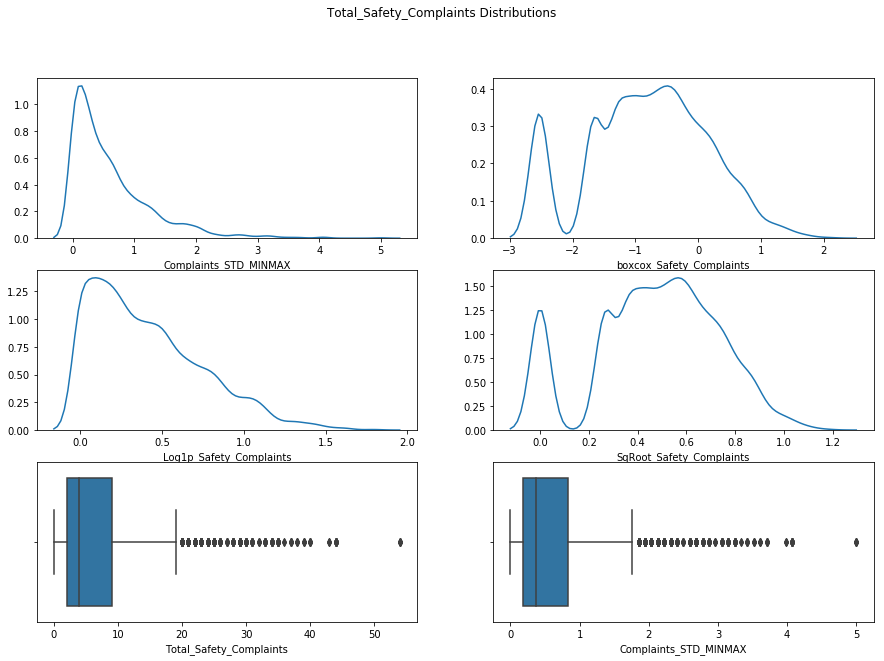

In [144]:
f, axes = plt.subplots(3, 2, figsize=(15,10))
sns.distplot(train['Complaints_STD_MINMAX'], ax=axes[0,0], hist=False)
sns.distplot(boxcox(train['Complaints_STD_MINMAX']+0.01)[0], axlabel='boxcox_Safety_Complaints', ax=axes[0,1], hist=False)
sns.distplot(np.log1p(train['Complaints_STD_MINMAX']), axlabel='Log1p_Safety_Complaints', ax=axes[1,0], hist=False)
sns.distplot(np.log1p(train['complaint_safe_root']), axlabel='SqRoot_Safety_Complaints', ax=axes[1,1], hist=False)
sns.boxplot(x='Total_Safety_Complaints', data=train, ax=axes[2,0])
sns.boxplot(x='Complaints_STD_MINMAX', data=train, ax=axes[2,1])
plt.suptitle('Total_Safety_Complaints Distributions')
plt.show()

Removing outliers and testing distribution

In [131]:
IQR = 9-2
upp = 1.5*IQR + 9
# lower = 
# Lower is not required since there are no outliers below the first quartile

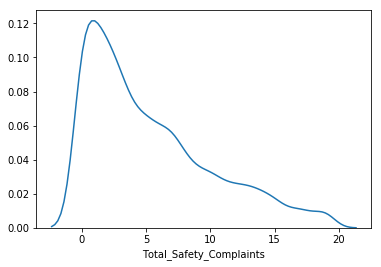

In [141]:
sns.distplot(train[train['Total_Safety_Complaints']<upp]['Total_Safety_Complaints'].reset_index(drop=True), hist=False)

Using Scaled Variable to treat outliers

In [143]:
train['Complaints_STD_MINMAX'].describe()

count    10000.000000
mean         0.607806
std          0.645554
min          0.000000
25%          0.185185
50%          0.370370
75%          0.833333
max          5.000000
Name: Complaints_STD_MINMAX, dtype: float64

In [145]:
IQR = 0.833333 - 0.185185
upp = 1.5*IQR + 0.833333

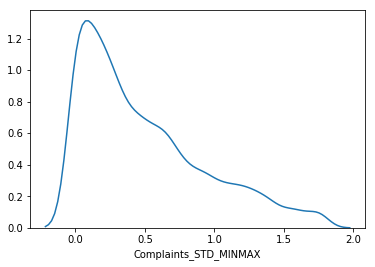

In [146]:
sns.distplot(train[train['Complaints_STD_MINMAX']<upp]['Complaints_STD_MINMAX'].reset_index(drop=True), hist=False)

Observations:
    1.After removing outliers, Complaints still remain right skewed
    2.Feature Engineering --> Add inception days with this feature (might give multiColl)